### Copying images to training, validation, and test directories

- original dataset from: www.kaggle.com/c/dogs-vs-cats/data
- The pictures are medium-resolution color JPEGs
- dataset contains 25,000 images of dogs and cats (12,500 from each class)
- we'll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.



In [8]:
import os, shutil

#Path to the directory where the original dataset was uncompressed
original_dataset_dir_train = r'\Users\avina\OneDrive\Desktop\Destop_Folders\Data\Cats-Dogs-kaggle\train'
#Directory where you’ll store your smaller dataset
base_dir = r'\Users\avina\OneDrive\Desktop\Destop_Folders\Data\Cats-Dogs-kaggle\minimized_dataset'
os.mkdir(base_dir)


#Directories forthe training,validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
#Copies the first 1,000 cat images from train to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
#Copies the next 500 cat images from train to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


In [12]:
#Copies the next 500 cat images from train to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
##Copies the first 1,000 dogs images from train to train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
#Copies the next 500 dogs images from train to validation_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:

#Copies the next 500 dogs images from train to test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


2,000 training images, 1,000 validation images, and 1,000 test
images. Each split contains the same number of samples from each class: this is a balanced
binary-classification problem, which means classification accuracy will be an
appropriate measure of success.

### Data Preprocessing

data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has a module with image-processing helper tools, located at
keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,
which lets you quickly set up Python generators that can automatically turn image files
on disk into batches of preprocessed tensors.

In [20]:
#Using ImageDataGenerator to read images from directories

from keras.preprocessing.image import ImageDataGenerator

#Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir, #target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=20, 
    class_mode='binary'#Because we use binary_crossentropy loss, you need binary labels.
    )

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Building the Convnet 

We’ll reuse the same general structure: the convnet will be a
stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

NOTE The depth of the feature maps progressively increases in the network
(from 32 to 128), whereas the size of the feature maps decreases (from 148 ×
148 to 7 × 7). This is a pattern we’ll see in almost all convnets.

Thus each image is of size 150 X 150

In [17]:
#Instantiating a small convnet for dogs vs. cats classification
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
#Configuring the model for training
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

- We will fit the model using fit_generator method as we are using data generators. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely. 
- Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an
epoch over.
- This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.
- When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If we pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus we should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation

In [24]:
#Fitting the model using a batch generator
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 75s 746ms/step - loss: 0.6832 - acc: 0.5500 - val_loss: 0.6802 - val_acc: 0.5100
Epoch 2/30
100/100 [==============================] - 61s 613ms/step - loss: 0.6365 - acc: 0.6380 - val_loss: 0.6305 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 65s 646ms/step - loss: 0.5850 - acc: 0.6935 - val_loss: 0.7818 - val_acc: 0.5550
Epoch 4/30
100/100 [==============================] - 63s 629ms/step - loss: 0.5562 - acc: 0.7095 - val_loss: 0.6121 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 63s 633ms/step - loss: 0.5328 - acc: 0.7305 - val_loss: 0.5997 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 63s 629ms/step - loss: 0.5062 - acc: 0.7540 - val_loss: 0.5821 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 65s 646ms/step - loss: 0.4810 - acc: 0.7710 - val_loss: 0.56

In [25]:
#Saving the model
model.save('cats_and_dogs_small_1.h5')

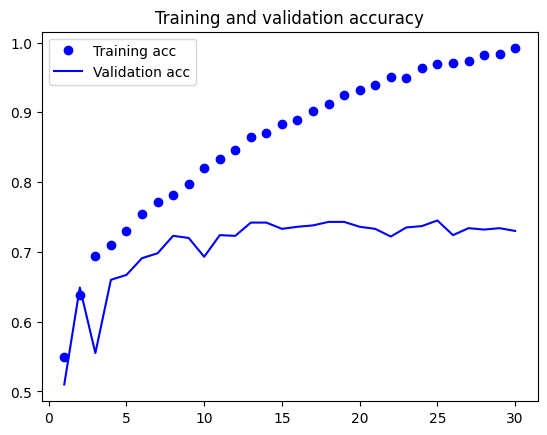

In [27]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt



acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

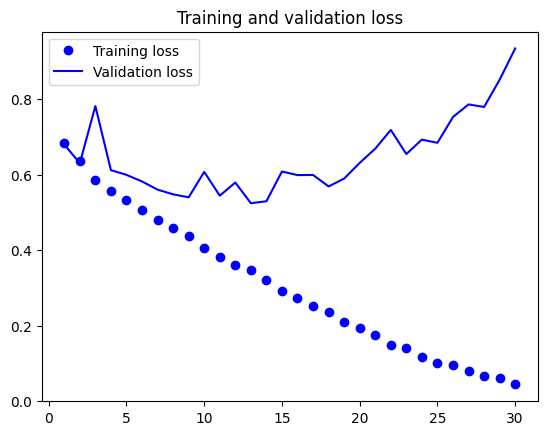

In [28]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.

The reason is due to having relatively few training samples (2,000)

### Using data Augumentation technique to mitigate overfitting

- Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images.
- The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.
- In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance

In [29]:
#Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
rotation_range=40, #is a value in degrees (0–180), a range within which to randomly rotate pictures.
width_shift_range=0.2,
height_shift_range=0.2,
#width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
shear_range=0.2, #is for randomly applying shearing transformations.
zoom_range=0.2, #is for randomly zooming inside pictures
horizontal_flip=True,#for randomly flipping half the images horizontally
fill_mode='nearest' #is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
)

In [30]:
#Displaying some randomly augmented training images
from keras.preprocessing import image


fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

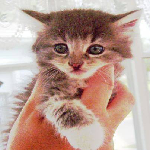

In [31]:
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
img

In [33]:
#Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
x


array([[[222., 223., 218.],
        [223., 224., 219.],
        [223., 224., 219.],
        ...,
        [240., 241., 246.],
        [234., 235., 240.],
        [247., 244., 251.]],

       [[219., 220., 215.],
        [222., 223., 218.],
        [224., 225., 220.],
        ...,
        [243., 244., 249.],
        [234., 235., 240.],
        [239., 242., 247.]],

       [[226., 227., 222.],
        [224., 225., 220.],
        [223., 224., 219.],
        ...,
        [242., 243., 248.],
        [241., 242., 247.],
        [232., 240., 243.]],

       ...,

       [[207., 210., 215.],
        [207., 213., 213.],
        [206., 212., 208.],
        ...,
        [215., 212., 207.],
        [215., 212., 207.],
        [217., 212., 209.]],

       [[219., 212., 220.],
        [211., 209., 212.],
        [206., 206., 204.],
        ...,
        [215., 212., 207.],
        [215., 212., 207.],
        [217., 212., 209.]],

       [[213., 217., 226.],
        [206., 212., 212.],
        [206., 2

In [35]:
#Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
x

array([[[[222., 223., 218.],
         [223., 224., 219.],
         [223., 224., 219.],
         ...,
         [240., 241., 246.],
         [234., 235., 240.],
         [247., 244., 251.]],

        [[219., 220., 215.],
         [222., 223., 218.],
         [224., 225., 220.],
         ...,
         [243., 244., 249.],
         [234., 235., 240.],
         [239., 242., 247.]],

        [[226., 227., 222.],
         [224., 225., 220.],
         [223., 224., 219.],
         ...,
         [242., 243., 248.],
         [241., 242., 247.],
         [232., 240., 243.]],

        ...,

        [[207., 210., 215.],
         [207., 213., 213.],
         [206., 212., 208.],
         ...,
         [215., 212., 207.],
         [215., 212., 207.],
         [217., 212., 209.]],

        [[219., 212., 220.],
         [211., 209., 212.],
         [206., 206., 204.],
         ...,
         [215., 212., 207.],
         [215., 212., 207.],
         [217., 212., 209.]],

        [[213., 217., 226.],
       

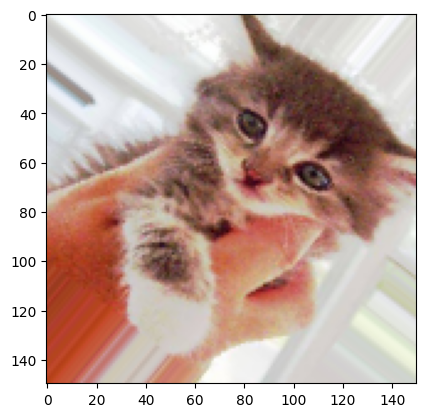

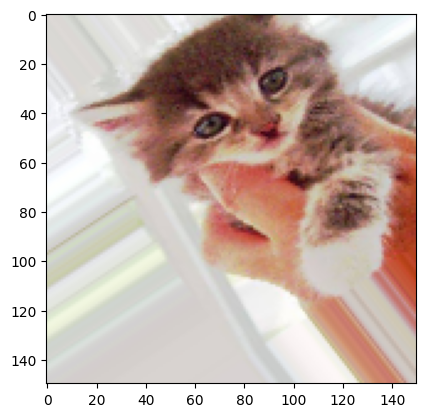

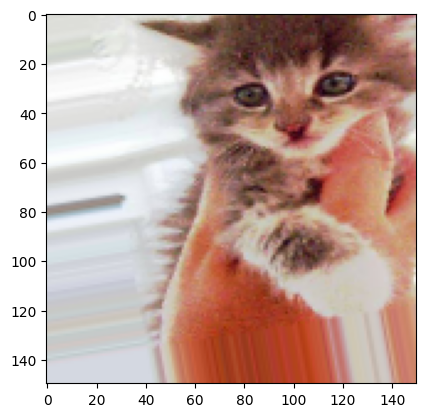

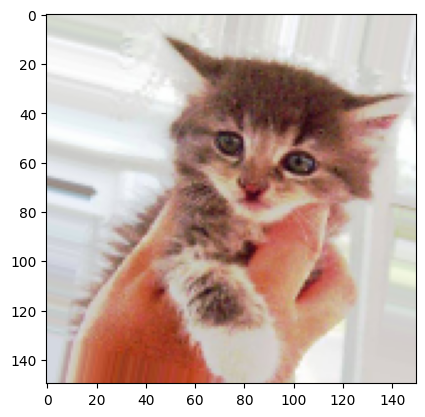

In [39]:
i = 0
#Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

If we train a new network with the output of data augumentation process, the network will look at the same picture again but still these pictures are highly corelated with each other, as they are the same picture. We cannot produce unique informationout of the images. To migitate more risk of overfitting, we will use a DROPOUT layer right before the densely connected classifier layer.

Dropout definition:-
- Dropout, applied to a layer, consists of randomly dropping out
(setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input
sample during training. After applying dropout, this vector will have a few zero entries
distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction
of the features that are zeroed out; it’s usually set between 0.2 and 0.5.

In [40]:
#Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [41]:
#Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [44]:
#Note that the validation data shouldn’t be augmented!
#so we just rescale it

test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [51]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [52]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')


Found 1000 images belonging to 2 classes.


In [53]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 68s 677ms/step - loss: 0.6809 - acc: 0.5550 - val_loss: 0.6616 - val_acc: 0.6090
Epoch 2/100
100/100 [==============================] - 68s 676ms/step - loss: 0.6695 - acc: 0.5885 - val_loss: 0.6527 - val_acc: 0.6090
Epoch 3/100
100/100 [==============================] - 67s 665ms/step - loss: 0.6599 - acc: 0.6030 - val_loss: 0.6430 - val_acc: 0.6150
Epoch 4/100
100/100 [==============================] - 71s 706ms/step - loss: 0.6519 - acc: 0.6075 - val_loss: 0.6214 - val_acc: 0.6540
Epoch 5/100
100/100 [==============================] - 63s 632ms/step - loss: 0.6447 - acc: 0.6195 - val_loss: 0.6020 - val_acc: 0.6760
Epoch 6/100
100/100 [==============================] - 62s 623ms/step - loss: 0.6212 - acc: 0.6700 - val_loss: 0.6061 - val_acc: 0.6590
Epoch 7/100
100/100 [==============================] - 66s 655ms/step - loss: 0.6202 - acc: 0.6505 - val_loss: 0.6007 - val_acc: 0.6740
Epoch 8/100
100/100 [===========================

In [54]:
model.save('cats_and_dogs_small_2.h5')

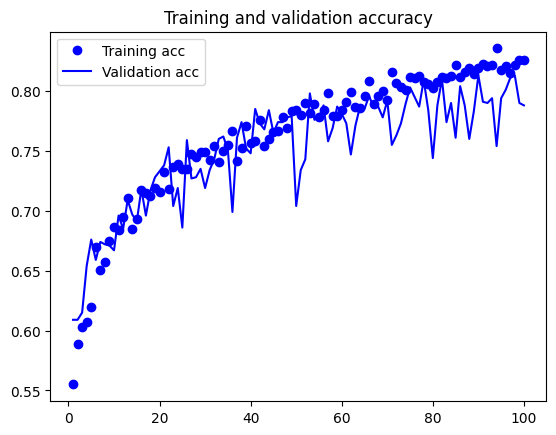

In [55]:
#Displaying curves of loss and accuracy during training


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


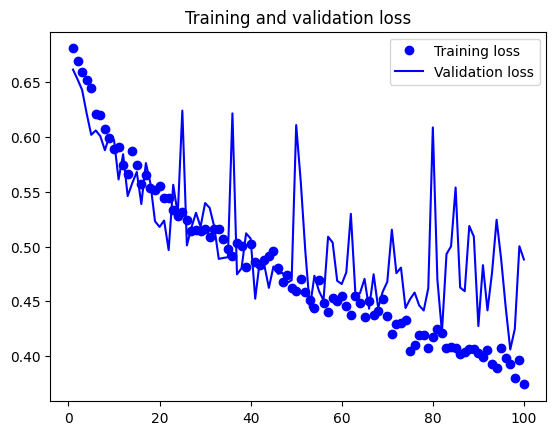

In [56]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Using a pretrained model to train to classify cats & dogs problem

There are two ways to use a pretrained network: feature extraction and fine-tuning.

Feature extraction consists of using the representations learned by a previous network
to extract interesting features from new samples. These features are then run through
a new classifier, which is trained from scratch.

Feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output

We will only reuse the convolutional base not the densely connected layers because the representation learned by the convolutional base layers are likely to be more generic and reusable since it learns the generic concepts about a picture which is likely to be useful regardless of the computer-vision problem at hand.

But the representations learned by the densely cnnected layer/classifier will necessarily be specific to the
set of classes on which the model was trained—they will only contain information about
the presence probability of this or that class in the entire picture.


Note:
- the level of generality (and therefore reusability) of the representations
extracted by specific convolution layers depends on the depth of the layer in the
model. Layers that come earlier in the model extract local, highly generic feature
maps (such as visual edges, colors, and textures), whereas layers that are higher up
extract more-abstract concepts (such as “cat ear” or “dog eye”). So if your new dataset
differs a lot from the dataset on which the original model was trained, you may be better
off using only the first few layers of the model to do feature extraction, rather than
using the entire convolutional base.

In this case, because the ImageNet class set contains multiple dog and cat classes,
it’s likely to be beneficial to reuse the information contained in the densely connected
layers of the original model. But we’ll choose not to, in order to cover the more general
case where the class set of the new problem doesn’t overlap the class set of the
original model.

Let's start with using the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from cat and dog
images, and then train a dogs-versus-cats classifier on top of these features.


In [58]:
#Instantiating the VGG16 convolutional base
from keras.applications import VGG16


conv_base = VGG16(weights='imagenet', #specifies the weight checkpoint from which to initialize the model
include_top=False,   #refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to
# the 1,000 classes from ImageNet. Because you intend to use your own densely connected classifier (with only two classes: cat and dog), you don’t need to include it.
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 4s 0us/step


In [59]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

The final feature map has shape (4, 4, 512). That’s the feature on top of which we'll stick a densely connected classifier.

There are two ways we can proceed with the conv_base model:-
- Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.
- Extending the model we have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to usedata augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.

##### FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

We start by running instances of the previously introduced ImageDataGenerator to
extract images as Numpy arrays as well as their labels. We will extract features from
these images by calling the predict method of the conv_base model.

In [60]:
# Extracting features using the pretrained convolutional base

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [63]:
print(base_dir)
print(train_dir)
print(validation_dir)
print(test_dir)

\Users\avina\OneDrive\Desktop\Destop_Folders\Data\Cats-Dogs-kaggle\minimized_dataset
\Users\avina\OneDrive\Desktop\Destop_Folders\Data\Cats-Dogs-kaggle\minimized_dataset\train
\Users\avina\OneDrive\Desktop\Destop_Folders\Data\Cats-Dogs-kaggle\minimized_dataset\validation
\Users\avina\OneDrive\Desktop\Destop_Folders\Data\Cats-Dogs-kaggle\minimized_dataset\test


In [76]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [77]:
def extract_features(directory, sample_count):
    
    features = np.zeros(shape=(sample_count, 4, 4, 512))

    labels = np.zeros(shape=(sample_count))

    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

    i = 0

    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch #dividing the output into 20 different batches
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch #dividing the output into 20 different batches
        i += 1
        if i * batch_size >= sample_count: #let's for sample count 2000 & batch size 20, the generator will break in exactly 100th iteration to capture complete 2000 images
             break
    
    
    return features, labels

In [78]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them
to a densely connected classifier, so first you must flatten them to (samples, 8192):

In [79]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

At this point, we can define your densely connected classifier (note the use of dropout
for regularization) and train it on the data and labels that we just recorded.

In [80]:
#Defining and training the densely connected classifier

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 27ms/step - loss: 0.6235 - acc: 0.6725 - val_loss: 0.4585 - val_acc: 0.8350
Epoch 2/30
100/100 [==============================] - 3s 25ms/step - loss: 0.4350 - acc: 0.8005 - val_loss: 0.3693 - val_acc: 0.8660
Epoch 3/30
100/100 [==============================] - 3s 25ms/step - loss: 0.3645 - acc: 0.8385 - val_loss: 0.3384 - val_acc: 0.8550
Epoch 4/30
100/100 [==============================] - 3s 26ms/step - loss: 0.3092 - acc: 0.8690 - val_loss: 0.3012 - val_acc: 0.8880
Epoch 5/30
100/100 [==============================] - 3s 28ms/step - loss: 0.2920 - acc: 0.8850 - val_loss: 0.2856 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 3s 27ms/step - loss: 0.2722 - acc: 0.8950 - val_loss: 0.2801 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2460 - acc: 0.9045 - val_loss: 0.2872 - val_acc: 0.8770
Epoch 8/30
100/100 [==============================] - 3s 25ms/step - 

In [81]:
#Plotting the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


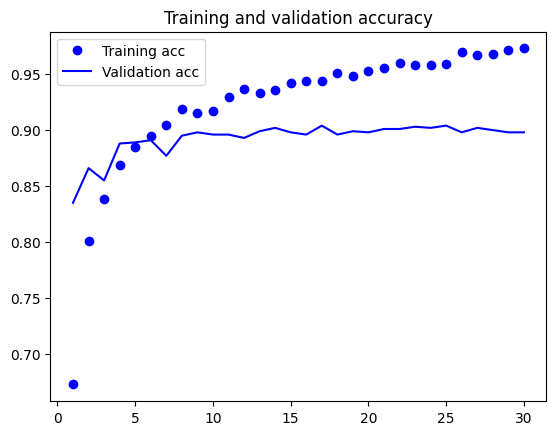

In [82]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

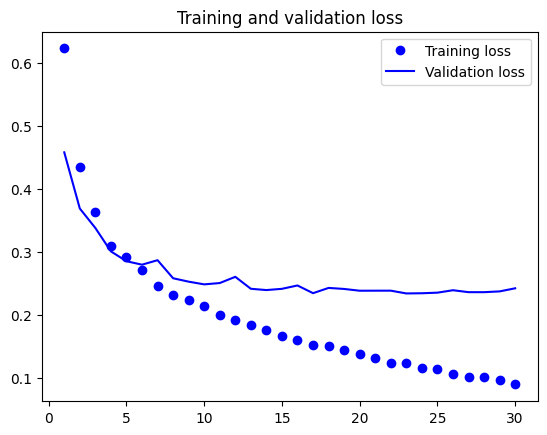

In [83]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plots indicate
that the model built i overfitting almost from the start—despite using dropout with a fairly large
rate. That’s because this technique doesn’t use data augmentation, which is essential
for preventing overfitting with small image datasets.

#### FEATURE EXTRACTION WITH DATA AUGMENTATION

In [84]:
#Adding a densely connected classifier on top of the convolutional base

from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before we compile and train the model, it’s very important to freeze the convolutional
base. 
- Freezing a layer or set of layers means preventing their weights from being
updated during training. 
- If we don’t do this, then the representations that were previously
learned by the convolutional base will be modified during training. 
- Because the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.

In [86]:
print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights ''after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


With this setup, only the weights from the two Dense layers that we added will be
trained. That’s a total of four weight tensors: two per layer (the main weight matrix
and the bias vector)

In [87]:
#Training the model end to end with a frozen convolutional base

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [88]:
train_generator = train_datagen.flow_from_directory( train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')


model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [89]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)


Epoch 1/30
100/100 [==============================] - 321s 3s/step - loss: 0.6145 - acc: 0.6685 - val_loss: 0.4651 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 321s 3s/step - loss: 0.4813 - acc: 0.7860 - val_loss: 0.3796 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 316s 3s/step - loss: 0.4310 - acc: 0.8095 - val_loss: 0.3344 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 313s 3s/step - loss: 0.4040 - acc: 0.8135 - val_loss: 0.3089 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 318s 3s/step - loss: 0.3747 - acc: 0.8375 - val_loss: 0.2952 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 316s 3s/step - loss: 0.3688 - acc: 0.8410 - val_loss: 0.2853 - val_acc: 0.8840
Epoch 7/30
100/100 [==============================] - 316s 3s/step - loss: 0.3631 - acc: 0.8400 - val_loss: 0.2744 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 316s 3s/step - 

In [90]:
#Plotting the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


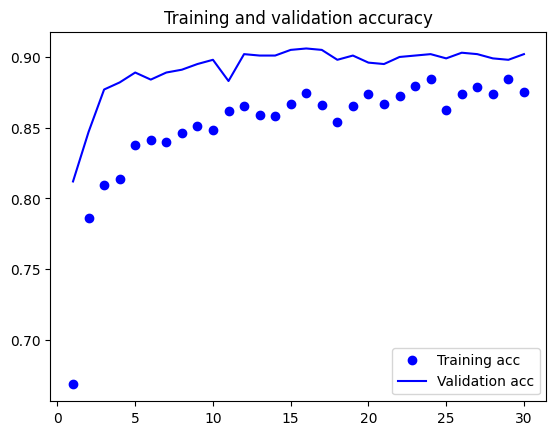

In [91]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

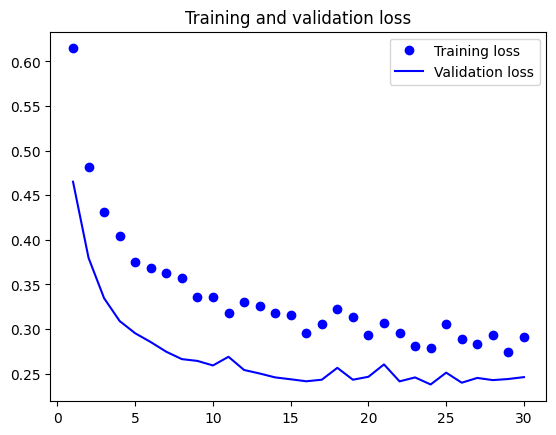

In [92]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

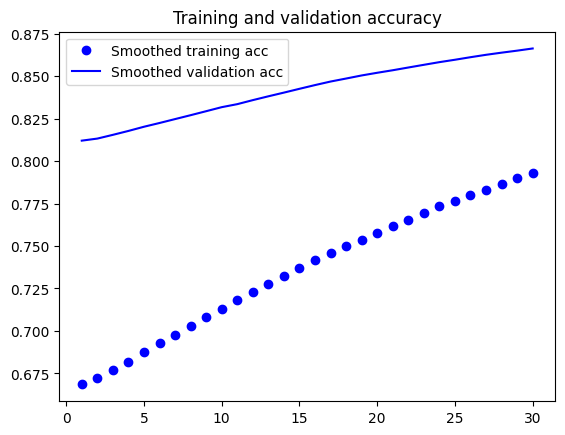

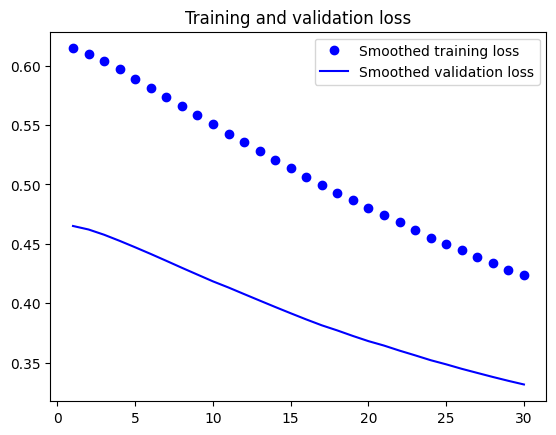

In [98]:
# Smoothing the plots
def smooth_curve(points, factor=0.965444):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [99]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8920000195503235


#### Using Fine-tuning 

Another widely used technique for model reuse, complementary to feature
extraction, is fine-tuning  .
- Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant
for the problem at hand.


it’s necessary to freeze the convolution base of VGG16 in order to
be able to train a randomly initialized classifier on top. For the same reason, it’s only
possible to fine-tune the top layers of the convolutional base once the classifier on top
has already been trained. If the classifier isn’t already trained, then the error signal
propagating through the network during training will be too large, and the representations
previously learned by the layers being fine-tuned will be destroyed. Thus the
steps for fine-tuning a network are as follow:
- Add your custom network on top of an already-trained base network.
-  Freeze the base network.
-  Train the part you added.
-  Unfreeze some layers in the base network.
-  Jointly train both these layers and the part you added.

In [100]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We will fine-tune the last three convolutional layers, which means all layers up to
block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
block5_conv3 should be trainable. The reason is:-
- Earlier layers in the convolutional base encode more-generic, reusable features,
whereas layers higher up encode more-specialized features. It’s more useful to
fine-tune the more specialized features, because these are the ones that need to
be repurposed on your new problem. There would be fast-decreasing returns in
fine-tuning lower layers.
- The more parameters you’re training, the more you’re at risk of overfitting.
The convolutional base has 15 million parameters, so it would be risky to
attempt to train it on your small dataset

in this situation, it’s a good strategy to fine-tune only the top two or three layers
in the convolutional base

In [102]:
#Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

we can begin fine-tuning the network. we will do this with the RMSProp optimizer,
using a very low learning rate. The reason for using a low learning rate is that
we want to limit the magnitude of the modifications we make to the representations
of the three layers you’re fine-tuning. Updates that are too large may harm these representations.


### Fine-tuning the model

In [103]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])


history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 355s 4s/step - loss: 0.2981 - acc: 0.8600 - val_loss: 0.2258 - val_acc: 0.9130
Epoch 2/100
100/100 [==============================] - 348s 3s/step - loss: 0.2629 - acc: 0.8895 - val_loss: 0.2394 - val_acc: 0.9010
Epoch 3/100
100/100 [==============================] - 336s 3s/step - loss: 0.2468 - acc: 0.9010 - val_loss: 0.1959 - val_acc: 0.9190
Epoch 4/100
100/100 [==============================] - 338s 3s/step - loss: 0.2197 - acc: 0.8990 - val_loss: 0.1981 - val_acc: 0.9260
Epoch 5/100
100/100 [==============================] - 340s 3s/step - loss: 0.2263 - acc: 0.9085 - val_loss: 0.1967 - val_acc: 0.9240
Epoch 6/100
100/100 [==============================] - 339s 3s/step - loss: 0.1879 - acc: 0.9290 - val_loss: 0.2075 - val_acc: 0.9210
Epoch 7/100
100/100 [==============================] - 339s 3s/step - loss: 0.1866 - acc: 0.9215 - val_loss: 0.1953 - val_acc: 0.9210
Epoch 8/100
100/100 [==============================] - 338s 3s

In [105]:
#Plotting the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


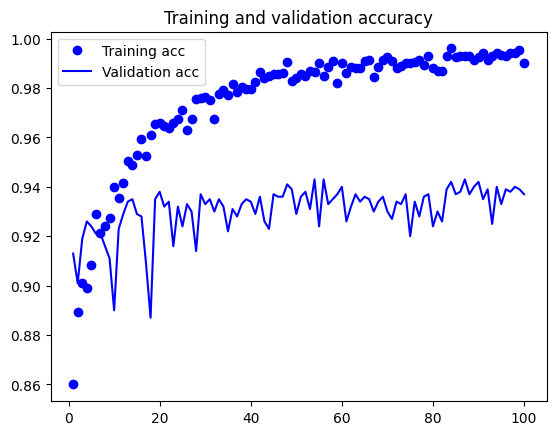

In [106]:

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


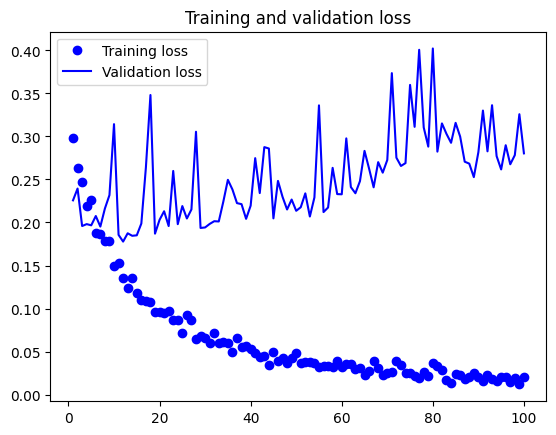

In [107]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [108]:
# Smoothing the plots
def smooth_curve(points, factor=0.965444):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


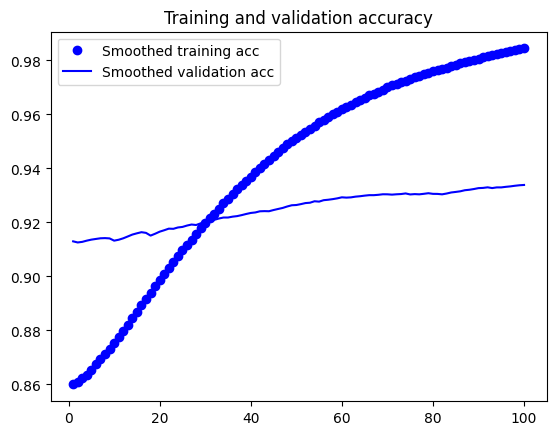

In [109]:
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()


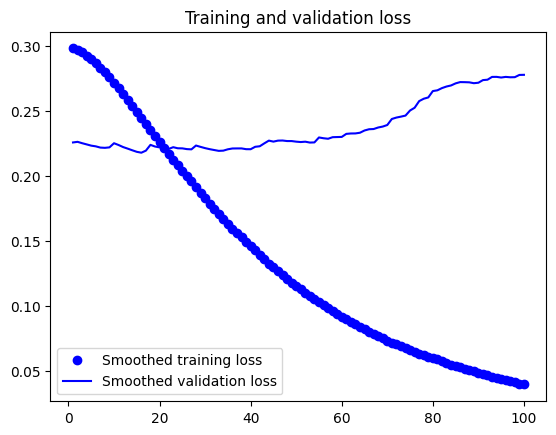

In [110]:
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [104]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9369999766349792


### Visualizing what convnets learn

The representations learned by convnets are highly controlled to visualization, in large part because they’re representations of visual concepts.
Three of the most accessible and useful techniques for visualizaing an interpreting convolution network representations are:-
- Visualizing intermediate convnet outputs (intermediate activations)—Useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.
- Visualizing convnets filters—Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.
- Visualizing heatmaps of class activation in an image—Useful for understandingwhich parts of an image were identified as belonging to a given class, thus allowing us to localize objects in images.

#### Visualizing intermediate activations

- Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network. 
- This gives a view into how an input is decomposed into the different filters learned by the network. We want to visualize feature maps with three dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image

In [111]:
from keras.models import load_model
#using the saved model 
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

Now we will get an input image—a picture of a cat, not part of the images the network was trained on.

In [112]:
#Preprocessing a single image

test_dir = r'\Users\avina\OneDrive\Desktop\Destop_Folders\Data\Cats-Dogs-kaggle\test'

In [115]:
from keras.preprocessing import image
import numpy as np

#taking 1700th cat image from test directory as an input
img = image.load_img(test_dir+r'\329.jpg', target_size=(150, 150))


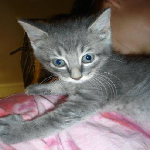

In [116]:
img

In [120]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#the model was trained on inputs that were preprocessed this way.
img_tensor /= 255.
img_tensor 


array([[[[0.18431373, 0.1254902 , 0.05098039],
         [0.18039216, 0.12156863, 0.04705882],
         [0.1764706 , 0.11764706, 0.04313726],
         ...,
         [0.23137255, 0.12156863, 0.07450981],
         [0.22352941, 0.13725491, 0.08627451],
         [0.22352941, 0.13725491, 0.08627451]],

        [[0.19215687, 0.13333334, 0.05882353],
         [0.18431373, 0.1254902 , 0.05098039],
         [0.18039216, 0.12156863, 0.04705882],
         ...,
         [0.24313726, 0.13333334, 0.08627451],
         [0.23529412, 0.14117648, 0.09411765],
         [0.23529412, 0.14117648, 0.09411765]],

        [[0.18431373, 0.1254902 , 0.05098039],
         [0.18431373, 0.1254902 , 0.05098039],
         [0.18431373, 0.1254902 , 0.05098039],
         ...,
         [0.25882354, 0.14901961, 0.10196079],
         [0.25490198, 0.14901961, 0.10588235],
         [0.2509804 , 0.14509805, 0.10196079]],

        ...,

        [[0.7176471 , 0.654902  , 0.7058824 ],
         [0.69411767, 0.6117647 , 0.67058825]

In [121]:
print(img_tensor.shape)

(1, 150, 150, 3)


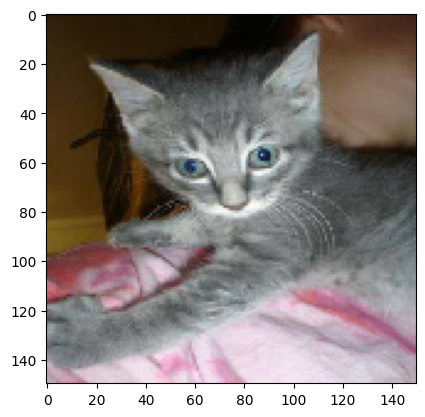

In [124]:
#Displaying the test picture
plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps we want to look at, we’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we’ll use the Keras class Model.

In [125]:
#extracting layers of the model
model.layers

In [127]:
#extracting output of any of above model
model.layers[0].output

<tf.Tensor 'conv2d_4/Relu_1:0' shape=(None, 148, 148, 32) dtype=float32>

In [129]:
#extracting input of any of above model
model.layers[0].input

<tf.Tensor 'conv2d_4_input_1:0' shape=(None, 150, 150, 3) dtype=float32>

In [128]:
#extracting output of any of above model
model.layers[1].output

<tf.Tensor 'max_pooling2d_4/MaxPool_1:0' shape=(None, 74, 74, 32) dtype=float32>

In [132]:
model.input

<tf.Tensor 'conv2d_4_input_1:0' shape=(None, 150, 150, 3) dtype=float32>

In [131]:
model.output

<tf.Tensor 'dense_3/Sigmoid_1:0' shape=(None, 1) dtype=float32>

In [133]:
from keras import models

#Extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]

#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model

When fed an image input, this model returns the values of the layer activations in the original model. This is an example of multi output model. In the general case, a model can have any number of inputs and outputs. This one has one input and eight outputs: one output per layer activation.

In [134]:
#Running the model in predict mode
activations = activation_model.predict(img_tensor)
activations
#Returns a list of five Numpy arrays: one array per layer activation

[array([[[[0.        , 0.01393007, 0.        , ..., 0.00133544,
           0.        , 0.        ],
          [0.        , 0.01458407, 0.0005091 , ..., 0.00192411,
           0.        , 0.        ],
          [0.        , 0.01251725, 0.        , ..., 0.00194752,
           0.        , 0.        ],
          ...,
          [0.        , 0.01495039, 0.        , ..., 0.0151485 ,
           0.        , 0.        ],
          [0.        , 0.00997243, 0.00279439, ..., 0.01700231,
           0.        , 0.        ],
          [0.        , 0.007149  , 0.        , ..., 0.01889341,
           0.        , 0.        ]],
 
         [[0.        , 0.01759367, 0.        , ..., 0.00250518,
           0.        , 0.        ],
          [0.        , 0.01561627, 0.0003366 , ..., 0.00274332,
           0.        , 0.        ],
          [0.        , 0.01294246, 0.        , ..., 0.00265797,
           0.        , 0.        ],
          ...,
          [0.        , 0.0167929 , 0.        , ..., 0.0164541 ,
   

In [135]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 148, 148, 32)


This is the activation of the first convolution layer for the cat image input: It’s a 148 × 148 feature map with 32 channels.

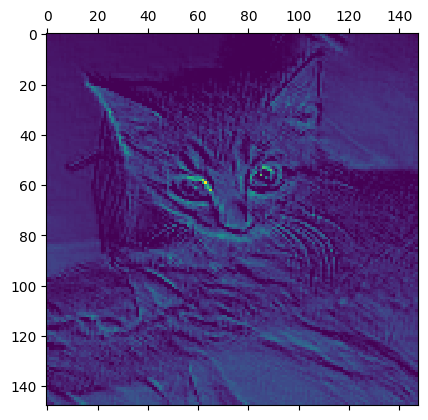

In [143]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

AxesImage(72,43.2;372x372)
AxesImage(72,43.2;372x372)
AxesImage(72,43.2;372x372)


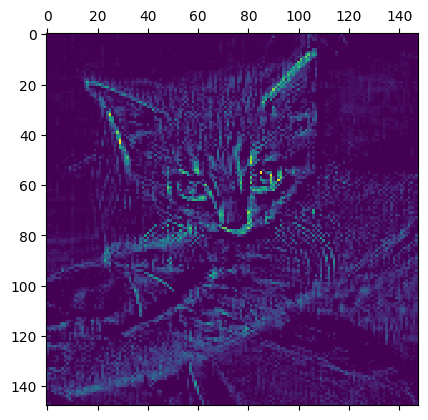

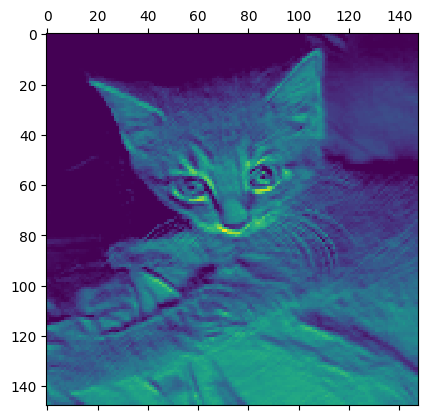

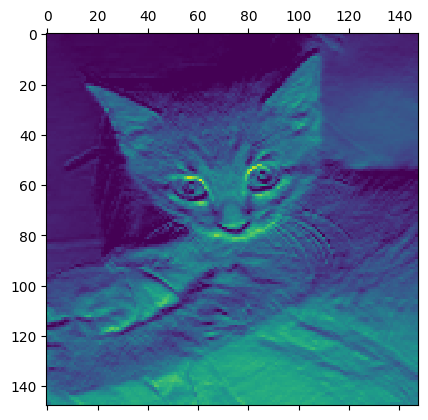

In [144]:
print(plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis'))
print(plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis'))
print(plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis'))


All channels encodes different feature of the image example edge, horizantle, vertical or diagonal lines etc.

Let's extract and plot every channel in each of the eight activation maps, and we’ll stack the results in one big image tensor, with channels stacked side by side.

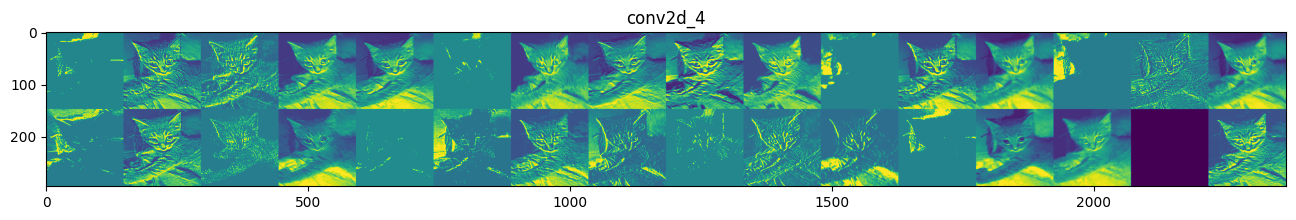

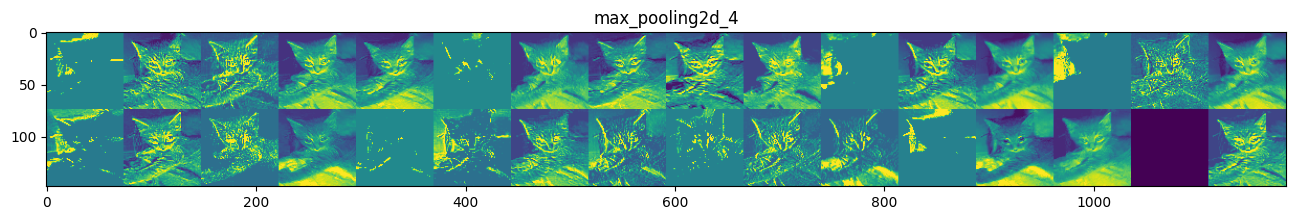

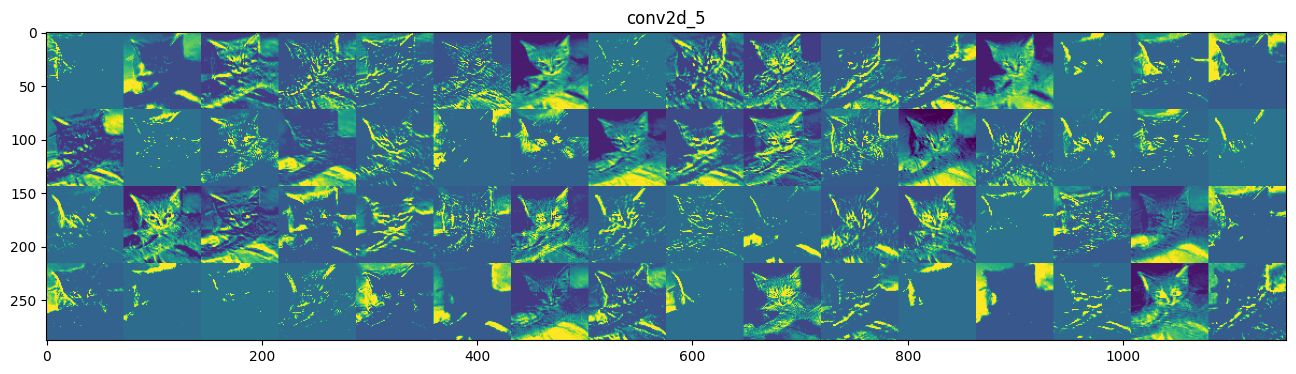

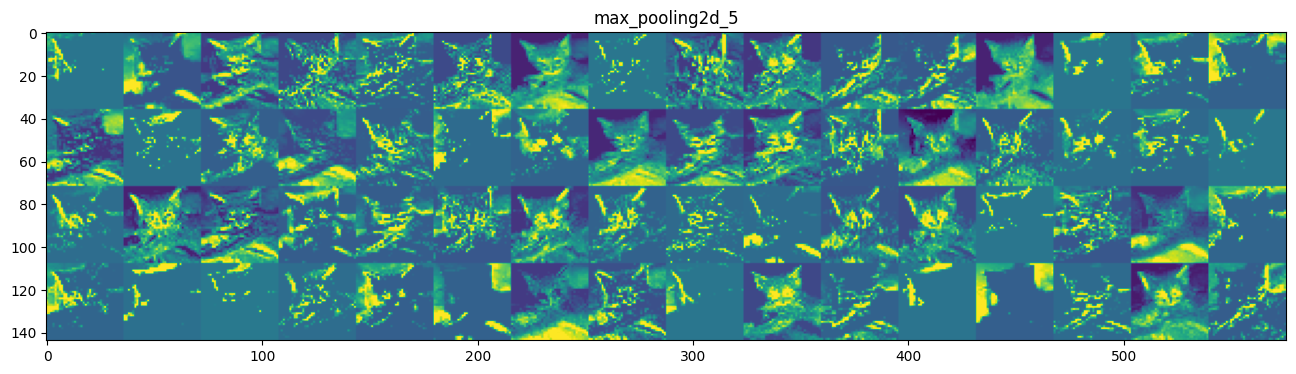

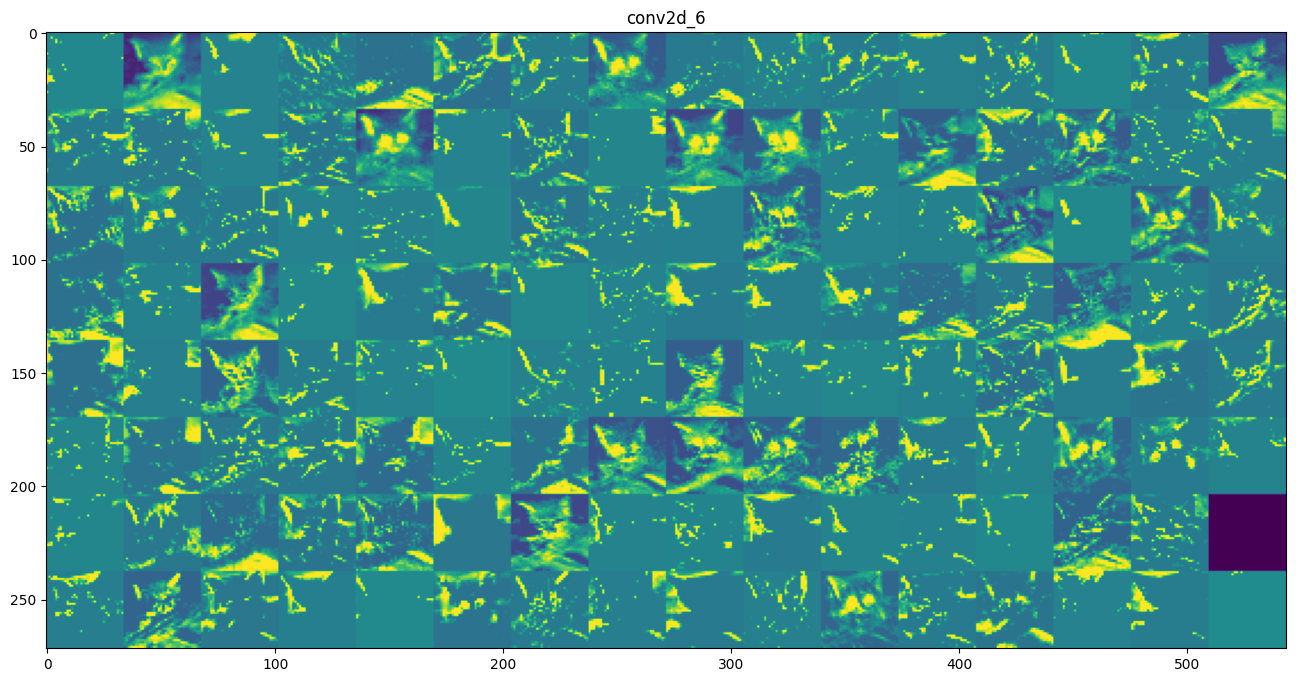

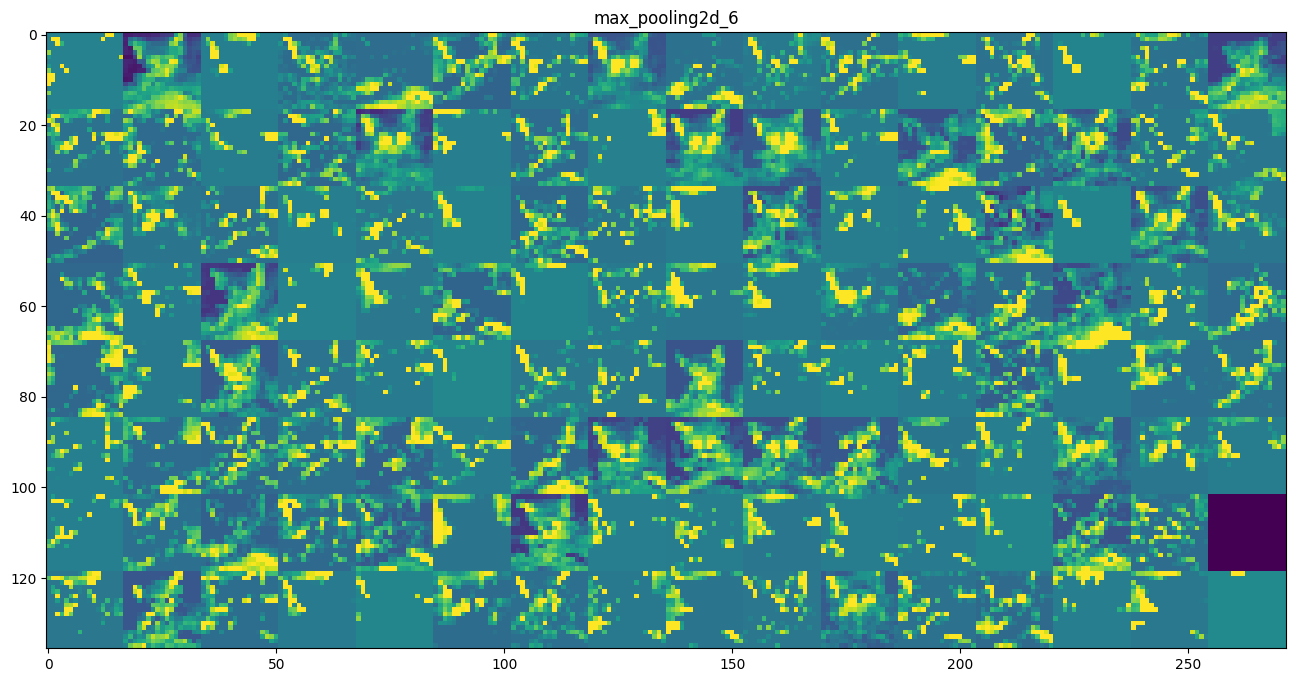

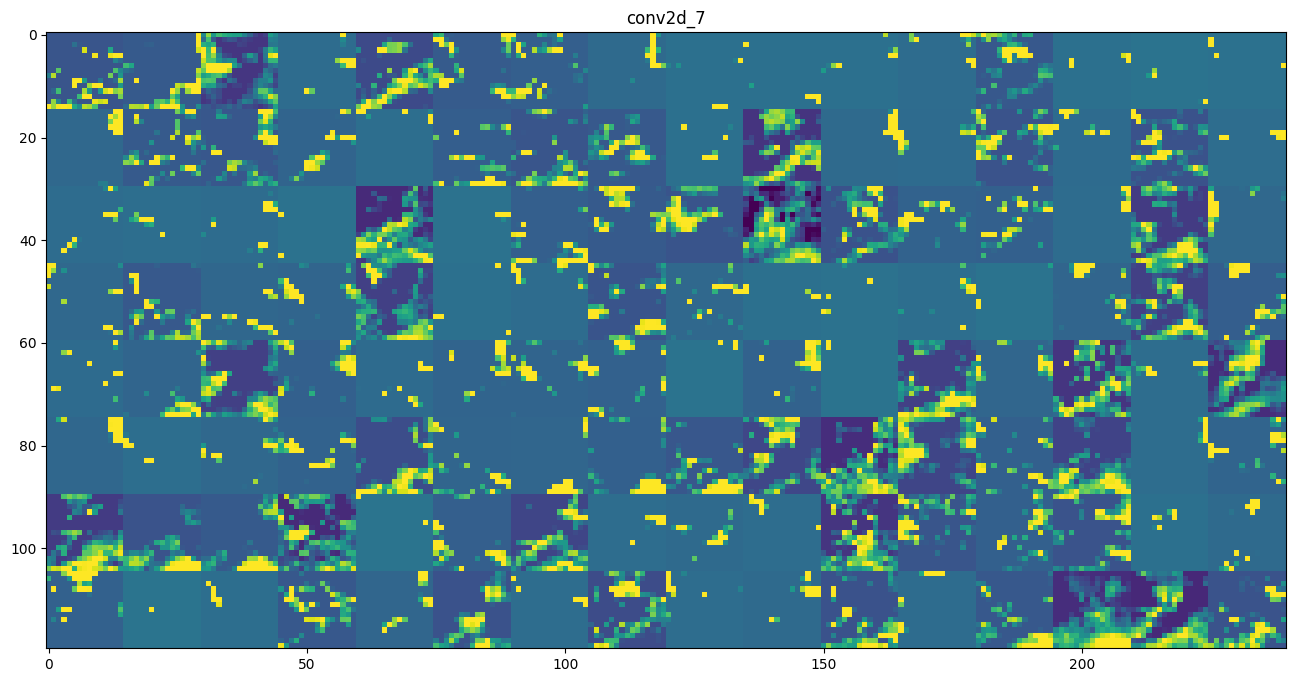

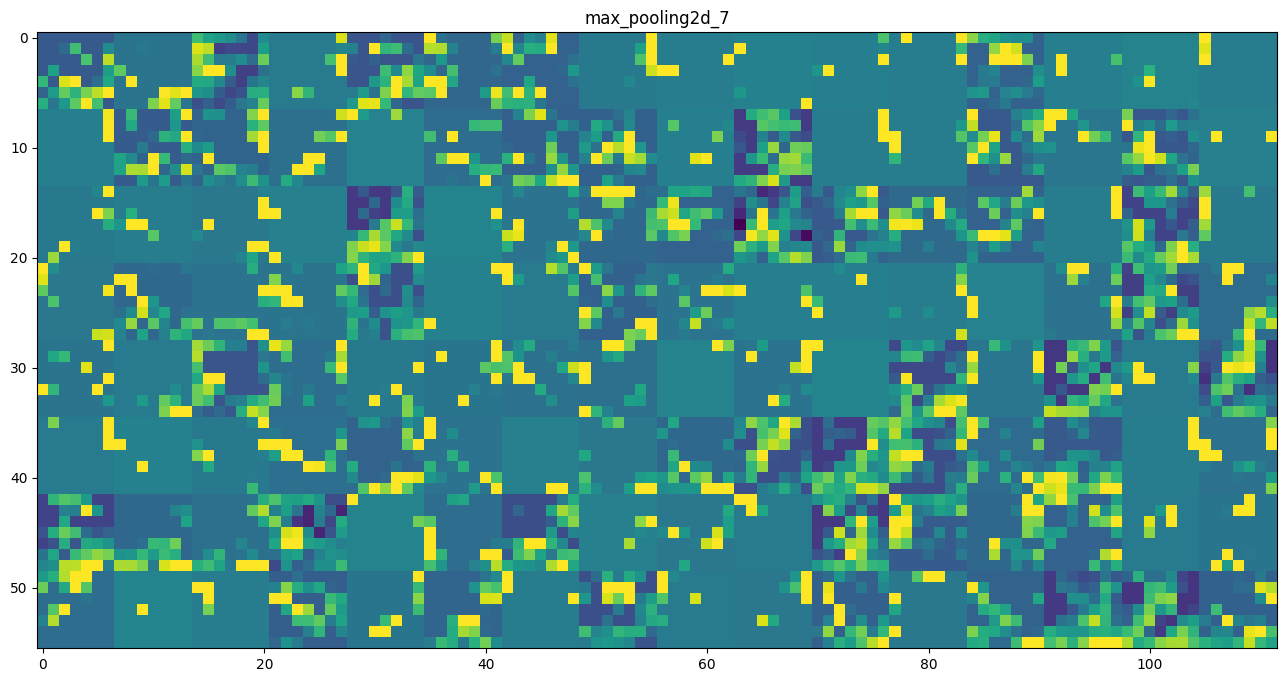

In [148]:
#Visualizing every channel in every intermediate activation

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)


images_per_row = 16

#iterating layer name and each of its activation soutput matrix
for layer_name, layer_activation in zip(layer_names, activations):
    # print(layer_activation.shape)
    #Number of features or filters or channels in the feature map
    n_features = layer_activation.shape[-1]

    #The feature map has shape (1, size, size, n_features).
    size = layer_activation.shape[1]


    #Tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    # print(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    #Tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]

            #Post-processes the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image


    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


There are a few things to note here:
- The first layer acts as a collection of various edge detectors. At that stage, the
activations retain almost all of the information present in the initial picture.
- As we go higher, the activations become increasingly abstract and less visually
interpretable. They begin to encode higher-level concepts such as “cat ear” and
“cat eye.” Higher presentations carry increasingly less information about the
visual contents of the image, and increasingly more information related to the
class of the image.
- The sparsity of the activations increases with the depth of the layer: in the first
layer, all filters are activated by the input image; but in the following layers,
more and more filters are blank. This means the pattern encoded by the filter
isn’t found in the input image.

#### Visualizing convnet filters

- Another easy way to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to. 
- This can be done with gradient ascent in input space: applying gradient descent to the value of the input image of a convnet so as
to maximize the response of a specific filter, starting from a blank input image. The resulting input image will be one that the chosen filter is maximally responsive to.

We’ll build a loss function that maximizes the value of a given filter in a given convolution layer, and then we’ll use stochastic gradient
descent to adjust the values of the input image so as to maximize this activation value.
For instance, here’s a loss for the activation of filter 0 in the layer block3_conv1 of the VGG16 network, pretrained on ImageNet.

In [158]:
#Defining the loss tensor for filter visualization

from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [159]:
#Obtaining the gradient of the loss with regard to the input    

grads = K.gradients(loss, model.input)[0]
grads
# The call to gradients returns a list of tensors (of size 1 in this case). Hence, you keep only the first element— which is a tensor.

<tf.Tensor 'gradients/block1_conv1/Conv2D_grad/Conv2DBackpropInput:0' shape=(None, None, None, 3) dtype=float32>

In [160]:
# Gradient-normalization trick
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
grads
#Add 1e–5 before dividing to avoid accidentally dividing by 0

<tf.Tensor 'truediv:0' shape=(None, None, None, 3) dtype=float32>

In [161]:
#Fetching Numpy output values given Numpy input values
iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [162]:
loss_value

0.0

In [163]:
grads

<tf.Tensor 'truediv:0' shape=(None, None, None, 3) dtype=float32>

In [164]:
#Loss maximization via stochastic gradient descent


#Starts from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1. #Magnitude of each gradient update
for i in range(40):
    loss_value, grads_value = iterate([input_img_data]) #Computes the loss value and gradient value
    input_img_data += grads_value * step  #Runs gradient ascent for 40 steps

In [165]:
input_img_data


array([[[[137.13432419, 138.5437654 , 147.44421053],
         [145.27303864, 143.5683242 , 144.59824506],
         [149.63995301, 150.26943883, 153.42662668],
         ...,
         [147.61195794, 132.17246381, 135.80657969],
         [132.03372137, 136.93233848, 145.3106708 ],
         [133.19390142, 147.58052206, 141.49547824]],

        [[149.39335657, 165.08833997, 153.33609045],
         [150.24448812, 161.12002576, 166.10928039],
         [151.61542035, 146.79605143, 150.13047263],
         ...,
         [135.08141027, 137.31619244, 132.35891755],
         [133.8884431 , 132.24041158, 134.30999844],
         [149.72044794, 132.91678325, 147.05236278]],

        [[153.67977956, 140.1056878 , 150.58674807],
         [131.1308892 , 133.60329768, 130.7121224 ],
         [128.00555328, 104.3900453 , 127.86501079],
         ...,
         [144.75298158, 129.43172445, 132.42687324],
         [142.65184593, 146.98927394, 126.17756956],
         [148.70974284, 150.68875743, 140.18761556]],

The resulting image tensor is a floating-point tensor of shape (1, 150, 150, 3), with
values that may not be integers within [0, 255]. Hence, you need to postprocess this
tensor to turn it into a displayable image. You do so with the following straightforward
utility function.

In [166]:
#Utility function to convert a tensor into a valid image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1              #Normalizes the tensor: centers on 0, ensures that std is 0.1
    x += 0.5
    x = np.clip(x, 0, 1)    #Clips to [0, 1]
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')   #Converts to an RGB array
    return x

Let’s put them together into a Python function that takes
as input a layer name and a filter index, and returns a valid image tensor representing
the pattern that maximizes the activation of the specified filter.

In [167]:
# Function to generate filter visualizations

def generate_pattern(layer_name, filter_index, size=150):

    #Builds a loss function that maximizes the activation of the nth filter of the layer under consideration
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    #Computes the gradient of the input picture with regard to this loss
    grads = K.gradients(loss, model.input)[0]

    #normalizes the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    #Returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])

    #Starts from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    #Runs gradient ascent for 40 steps
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

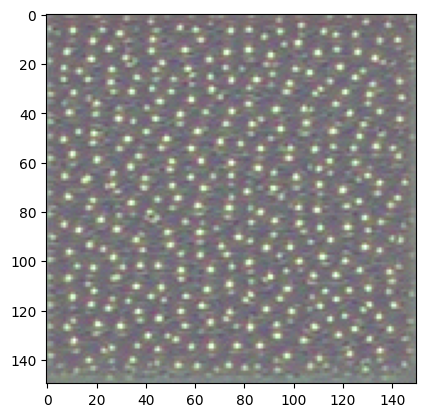

In [170]:
plt.imshow(generate_pattern('block3_conv1', 0))

It seems that filter 0 in layer block3_conv1 is responsive to a polka-dot pattern.

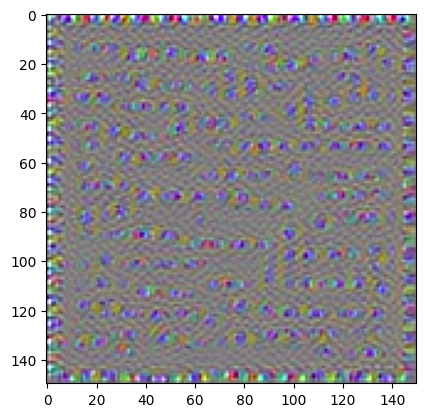

In [171]:
plt.imshow(generate_pattern('block3_conv1', 2))

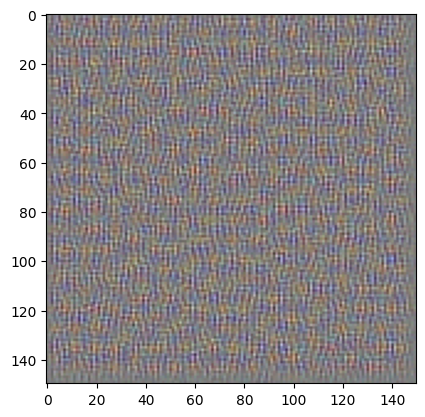

In [172]:
plt.imshow(generate_pattern('block3_conv1', 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


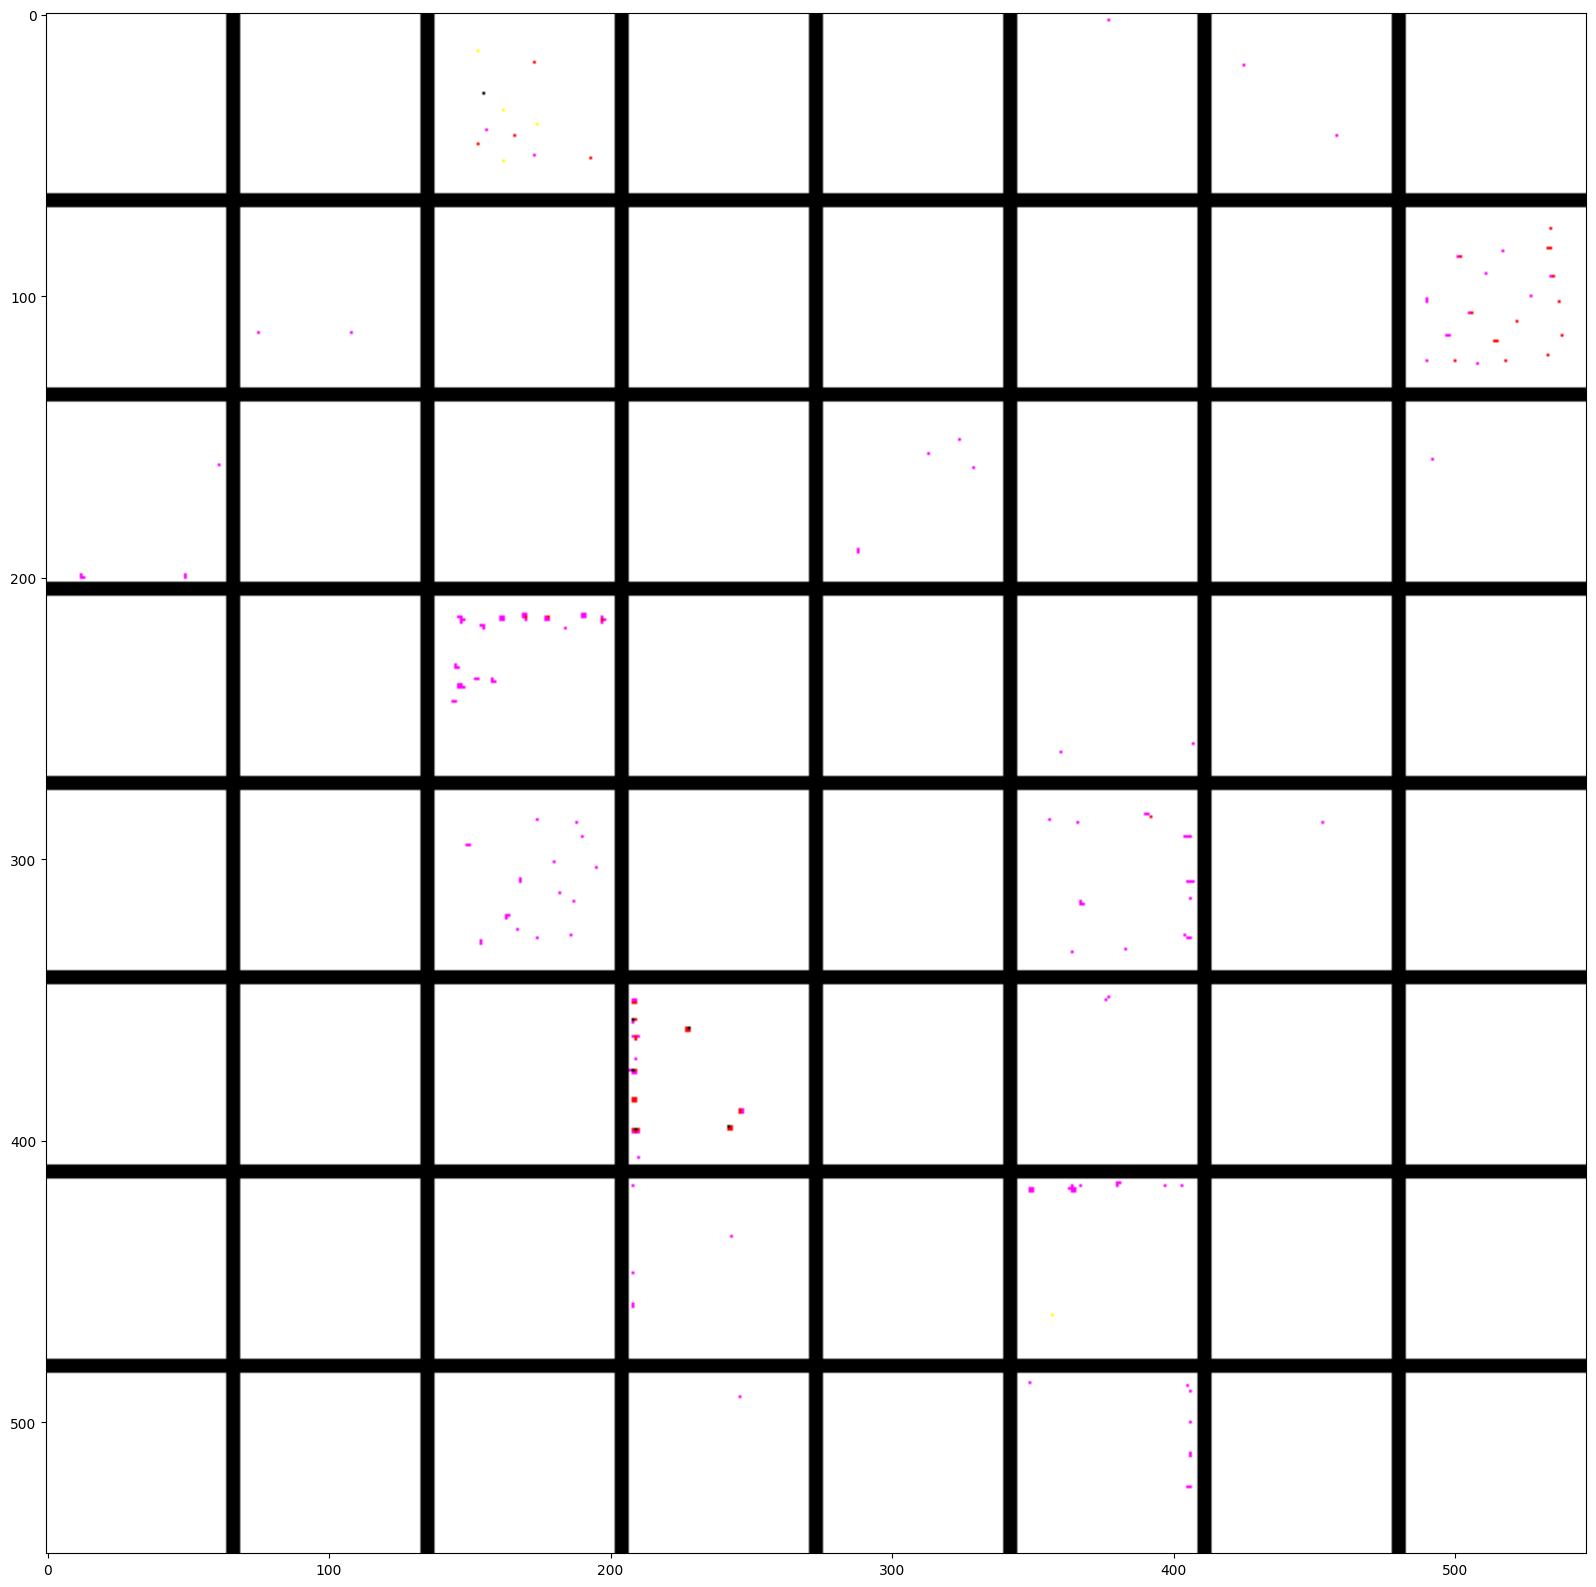

In [174]:
# Generating a grid of all filter response patterns in a layer

layer_name = 'block3_conv1'
size = 64
margin = 5

#Empty (black) image to store results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

#Iterates over the rows of the results grid
for i in range(8):
    #Iterates over the columns of the results grid
    for j in range(8):
        #Generates the pattern for filter i + (j * 8) in layer_name
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,vertical_start: vertical_end, :] = filter_img



plt.figure(figsize=(20, 20))
plt.imshow(results)


These filter visualizations tell you a lot about how convnet layers see the world: each layer in a convnet learns a collection of filters such that their inputs can be expressed as a combination of the filters. This is similar to how the Fourier transform decomposes signals onto a bank of cosine functions. The filters in these convnet filter banks get increasingly complex and refined as you go higher in the model:
- The filters from the first layer in the model (block1_conv1) encode simple
directional edges and colors (or colored edges, in some cases).
- The filters from block2_conv1 encode simple textures made from combinations
of edges and colors.
- The filters in higher layers begin to resemble textures found in natural images:
feathers, eyes, leaves, and so on.

#### Visualizing heatmaps of class activation

This technique is useful for understanding which parts of a given image led a convnet to its final classification decision. This is helpful for debugging the decision process of a convnet, particularly in the case of a
classification mistake. It also allows you to locate specific objects in an image.

This general category of techniques is called class activation map (CAM) visualization,
and it consists of producing heatmaps of class activation over input images. A class activation
heatmap is a 2D grid of scores associated with a specific output class, computed
for every location in any input image, indicating how important each location is with respect to the class under consideration. For instance, given an image fed into a dogsversus-
cats convnet, CAM visualization allows you to generate a heatmap for the class
“cat,” indicating how cat-like different parts of the image are, and also a heatmap for the
class “dog,” indicating how dog-like parts of the image are.

The specific implementation you’ll use is the one described in “Grad-CAM: Visual
Explanations from Deep Networks via Gradient-based Localization.”2 It’s very simple:
it consists of taking the output feature map of a convolution layer, given an input
image, and weighing every channel in that feature map by the gradient of the class
with respect to the channel. Intuitively, one way to understand this trick is that you’re
weighting a spatial map of “how intensely the input image activates different channels”
by “how important each channel is with regard to the class,” resulting in a spatial
map of “how intensely the input image activates the class.”

Let's demonstrate this technique using the pretrained VGG16:-

In [177]:

model = VGG16(weights='imagenet')


553467904/553467096 [==============================] - 66s 0us/step


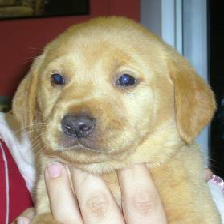

In [184]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

img = image.load_img(test_dir+r'\956.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
img

In [185]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02099712', 'Labrador_retriever', 0.835482), ('n02099601', 'golden_retriever', 0.10697524), ('n02100583', 'vizsla', 0.015942298)]


The top three classes predicted for this image are as follows:
- Labrador_retriever (with 83.5% probability)
- golden_retriever (with 10.6% probability)
- Vizsla (with 0.15% probability)

In [186]:
#Setting up the Grad-CAM algorithm

lab_retriever_output= model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(lab_retriever_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    
heatmap = np.mean(conv_layer_output_value, axis=-1)

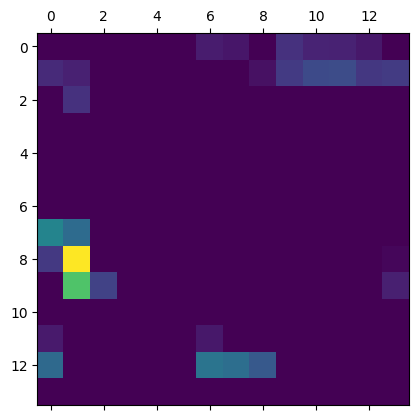

In [187]:
#Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [192]:
#Superimposing the heatmap with the original picture

import cv2
img = cv2.imread(test_dir+r'\956.jpg')
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('/Users/avina/Downloads/lab_retriever.jpg', superimposed_img)

ImportError: DLL load failed: The specified procedure could not be found.